## Table Of Content
1. Convolution layers
2. Max Pooling layers
3. OverFitting and UnderFitting
4. Data Agumentation



## Convolution layers

1. Visulization [https://poloclub.github.io/cnn-explainer/]
2. Viz 2 [https://adamharley.com/nn_vis/cnn/3d.html]

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import fashion_mnist
import  matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

In [2]:
(train_imgs , train_lab) , (test_imgs , test_lab) = fashion_mnist.load_data()
print(train_imgs.shape)
print(test_imgs.shape)

(60000, 28, 28)
(10000, 28, 28)


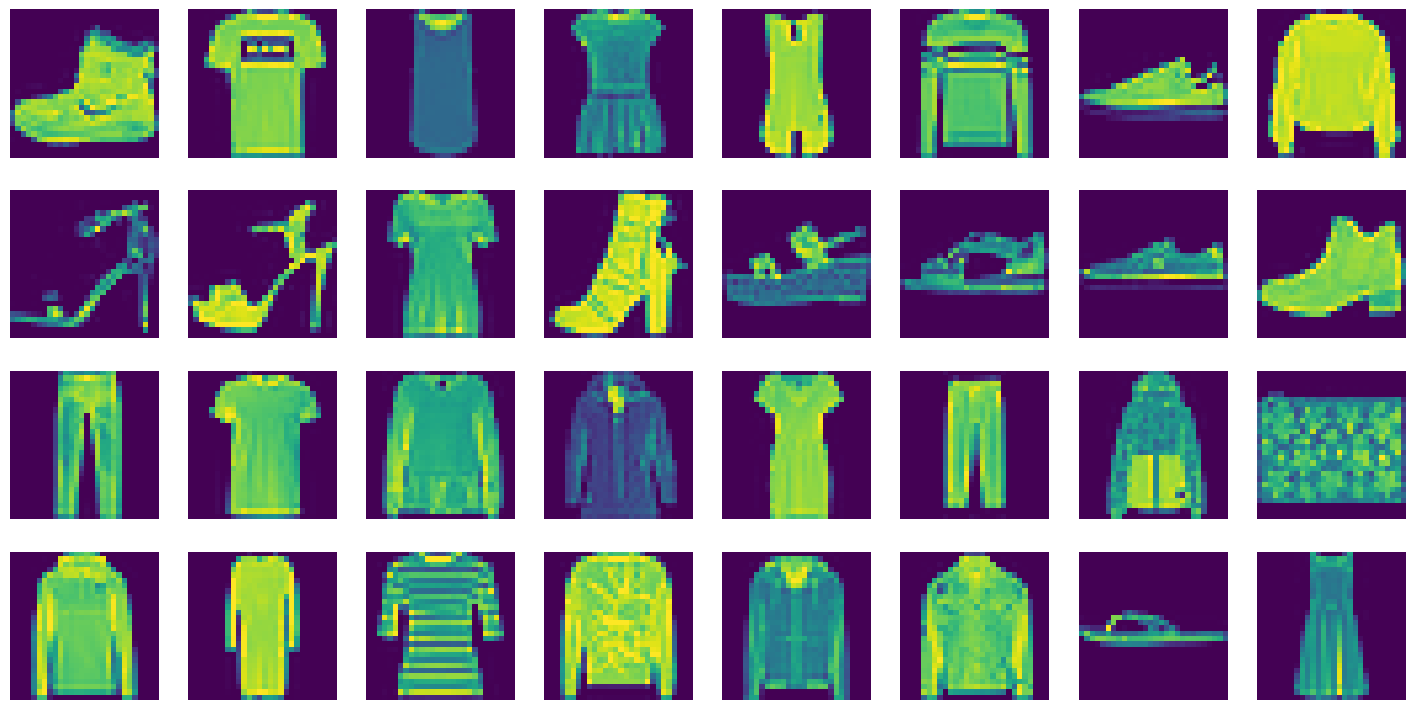

In [3]:
plt.figure(figsize=(18, 9))

num_rows = 4
num_cols = 8

# plot each of the images in the batch and the associated ground truth labels.
for i in range(num_rows*num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(train_imgs[i,:,:])
    plt.axis("off")

### Dataset Preprocessing

We normalize the image data to the range [0,1]. This is very common when working with image data which helps the model train more efficiently. We also convert the integer labels to one-hot encoded labels, as discussed in previous videos.

In [4]:
# Normalize images to the range [0, 1].
train_imgs = train_imgs.astype("float32") / 255
test_imgs  = test_imgs.astype("float32") / 255

# Change the labels from integer to categorical data.
print('Original (integer) label for the first training sample: ', train_lab[0])

# Convert labels to one-hot encoding.
train_lab = to_categorical(train_lab)
test_lab  = to_categorical(test_lab)

print('After conversion to categorical one-hot encoded labels: ', train_lab[0])


Original (integer) label for the first training sample:  9
After conversion to categorical one-hot encoded labels:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Dataset and Training Configuration Parameters

In [5]:
@dataclass(frozen =True)
class DataConfig:
  NUM_Of_Class : int = 10
  IMG_HIGH : int = 28
  IMG_WIDTH : int = 28
  NUM_CHANNELS : int = 1




In [6]:
@dataclass(frozen=True)
class TraiConfg:
  EPOCHS: int = 10
  BATCH_SIZE : int = 32
  LEARNING_RATE : float = 0.001

In [7]:
class CNN_ONLY:
  def __init__(self , input_shape = (28,28,1)):
    self.model = Sequential()
    self.input_shape = input_shape
    # Conv Block 1  with 32 filters
    self.model.add(Conv2D(filters = 32 , kernel_size = 3 , padding = 'same' , activation = 'relu'  , input_shape = self.input_shape))

    # Conv Block 1  with 64 filters
    self.model.add(Conv2D(filters = 64 , kernel_size = 3 , padding = 'same' , activation = 'relu' ) )

    # flatten
    self.model.add(Flatten())
    # Dense
    self.model.add(Dense(512, activation = 'relu'))
    self.model.add(Dense(10 , activation = 'softmax'))


  def get_model(self):
    return self.model





In [8]:
CNN_model = CNN_ONLY()
modelV1 = CNN_model.get_model()

In [9]:
modelV1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 512)               25690624  
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 25714570 (98.09 MB)
Trainable params: 25714570 (98.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
modelV1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
             )

In [11]:
hist1 = modelV1.fit(x = train_imgs ,
                   y = train_lab ,
                   batch_size = TraiConfg.BATCH_SIZE,
                   epochs = TraiConfg.EPOCHS,
                   verbose =  1 ,
                   validation_split = .3,
                   validation_data=(test_imgs, test_lab))

Epoch 1/10
1875/1875 [==============================] - 27s 12ms/step - loss: 0.3637 - accuracy: 0.8695 - val_loss: 0.2669 - val_accuracy: 0.9020
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2104 - accuracy: 0.9219 - val_loss: 0.2621 - val_accuracy: 0.9036
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1447 - accuracy: 0.9467 - val_loss: 0.2699 - val_accuracy: 0.9078
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0947 - accuracy: 0.9656 - val_loss: 0.3206 - val_accuracy: 0.9193
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0621 - accuracy: 0.9780 - val_loss: 0.4170 - val_accuracy: 0.9132
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0419 - accuracy: 0.9856 - val_loss: 0.4299 - val_accuracy: 0.9171
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0279 - accuracy: 0.9904 - val_loss: 0.5438 - v


## Plot the Training Results

The function below is a convenience function to plot training and validation losses and training and validation accuracies. It has a single required argument which is a list of metrics to plot.

In [12]:
modelV1.save('CNN_Only')

In [13]:
test_loss, test_acc = modelV1.evaluate(test_imgs, test_lab)
print(f"Test accuracy: {test_acc*100:.3f}")

313/313 [==============================] - 1s 4ms/step - loss: 0.7487 - accuracy: 0.9130
Test accuracy: 91.300


## MAX Pooling

![MAX Pooling](https://datascience.eu/wp-content/uploads/2020/09/image.png)
![MAX Pooling + CNN](https://learnopencv.com/wp-content/uploads/2023/01/tensorflow-keras-cnn-conv2d-layers.png)

In [14]:
# MAX Pooling + CNN Model
class CNN_MAXPooling:
  def __init__(self , input_shape = (28,28,1)):
    self.model = Sequential()
    self.input_shape = input_shape
    # Conv Block 1  with 32 filters
    self.model.add(Conv2D(filters = 32 , kernel_size = 3 , padding = 'same' , activation = 'relu'  , input_shape = self.input_shape))
    self.model.add(Conv2D(filters = 32 , kernel_size = 3 , padding = 'same' , activation = 'relu'))
    self.model.add(MaxPooling2D(pool_size = (2,2)))
    # Conv Block 2  with 64 filters
    self.model.add(Conv2D(filters = 64 , kernel_size = 3 , padding = 'same' , activation = 'relu' ) )
    self.model.add(Conv2D(filters = 64 , kernel_size = 3 , padding = 'same' , activation = 'relu' ) )
    self.model.add(MaxPooling2D(pool_size= (2,2)))

    # flatten
    self.model.add(Flatten())
    # Dense
    self.model.add(Dense(512, activation = 'relu'))
    self.model.add(Dense(10 , activation = 'softmax'))


  def get_model(self):
    return self.model


In [15]:
CNN_MAXPool_model = CNN_MAXPooling()
modelV2 = CNN_MAXPool_model.get_model()

In [16]:
modelV2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                 

In [17]:
modelV2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
             )

In [18]:
hist2 = modelV2.fit(x = train_imgs ,
                   y = train_lab ,
                   batch_size = TraiConfg.BATCH_SIZE,
                   epochs = TraiConfg.EPOCHS,
                   verbose =  1 ,
                   validation_split = .3,
                   validation_data=(test_imgs, test_lab))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3706 - accuracy: 0.8642 - val_loss: 0.2827 - val_accuracy: 0.8985
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2293 - accuracy: 0.9153 - val_loss: 0.2464 - val_accuracy: 0.9110
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1910 - accuracy: 0.9297 - val_loss: 0.2287 - val_accuracy: 0.9170
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1621 - accuracy: 0.9409 - val_loss: 0.2238 - val_accuracy: 0.9203
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1402 - accuracy: 0.9481 - val_loss: 0.2086 - val_accuracy: 0.9267
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1248 - accuracy: 0.9546 - val_loss: 0.2468 - val_accuracy: 0.9217
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1099 - accuracy: 0.9607 - val_loss: 0.2802 - val_ac

In [19]:
modelV2.save('CNN_MaxPooling')

In [20]:
test_loss, test_acc = modelV2.evaluate(test_imgs, test_lab)
print(f"Test accuracy: {test_acc*100:.3f}")

313/313 [==============================] - 2s 5ms/step - loss: 0.7487 - accuracy: 0.9130
Test accuracy: 91.300


### Discussion of Results
1. It looks like this model is significantly improved! The training accuracy is very high, and the validation accuracy has improved as well. This is a great result, as all we had to do was swap in a new model.

You may have noticed the validation accuracy jumping around. This is an indication that our model is still not generalizing perfectly. Fortunately, there's more that we can do. Let's talk about it in the next lecture.

![Overfiting vs UnderFiting](https://1394217531-files.gitbook.io/~/files/v0/b/gitbook-legacy-files/o/assets%2F-LvBP1svpACTB1R1x_U4%2F-LvNWUoWieQqaGmU_gl9%2F-LvNoby-llz4QzAK15nL%2Fimage.png?alt=media&token=41720ce9-bb66-4419-9bd8-640abf1fc415)

# Data Agumantation
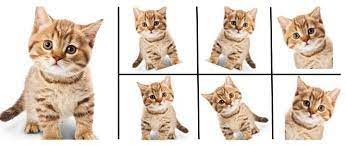

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [22]:
datagen =  ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True,
            vertical_flip=True
        )


# Update the shape of input data
train_imgs2 = np.expand_dims(train_imgs, axis=-1)  # Expand dimensions to include the channel
test_imgs2 = np.expand_dims(test_imgs, axis=-1)  # Expand dimensions to include the channel

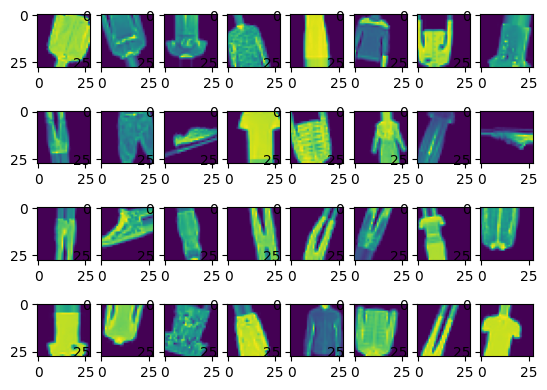

In [23]:
img_iter = datagen.flow(train_imgs2, train_lab, batch_size=32)

x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(32):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

### Fitting the Data to the Generator

In [24]:
datagen.fit(train_imgs2)

In [25]:
CNN_MAXPool_DataAug_model = CNN_MAXPooling()
modelV3 = CNN_MAXPool_DataAug_model.get_model()

In [26]:
modelV3.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
             )

### Training with Augmentation
When using an image data generator with Keras, a model trains a bit differently: instead of just passing the`x_train` and `y_train` datasets into the model, we pass the generator in, calling the generator's flow method. This causes the images to get augmented live and in memory right before they are passed into the model for training.

Generators can supply an indefinite amount of data, and when we use them to train our data, we need to explicitly set how long we want each epoch to run, or else the epoch will go on indefinitely, with the generator creating an indefinite number of augmented images to provide the model.

Run the following cell to see the results. The training will take longer than before, which makes sense given we are now training on more data than previously:

In [29]:
hist3 = modelV3.fit(img_iter,
                   epochs = TraiConfg.EPOCHS,
                   verbose =  1 ,
                   validation_split = .3,
                   validation_data=(test_imgs, test_lab))

Epoch 1/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.4791 - accuracy: 0.8353 - val_loss: 0.5700 - val_accuracy: 0.8296
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.4810 - accuracy: 0.8334 - val_loss: 0.5464 - val_accuracy: 0.8509
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.4887 - accuracy: 0.8339 - val_loss: 0.4833 - val_accuracy: 0.8560
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4901 - accuracy: 0.8350 - val_loss: 0.5430 - val_accuracy: 0.8327
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4943 - accuracy: 0.8319 - val_loss: 0.5037 - val_accuracy: 0.8493
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.5006 - accuracy: 0.8289 - val_loss: 0.4096 - val_accuracy: 0.8623
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.5041 - accuracy: 0.8285 - val_loss: 0.4513 -

In [30]:
# Save Model
modelV3.save('CNN_Pooling_DataAug_model')

## Discussion of Results
You will notice that the validation accuracy is higher, and more consistent. This means that our model is no longer overfitting in the way it was; it generalizes better, making better predictions on new data.